In [19]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, classification_report

In [20]:
deb = pd.read_parquet('pred_deb_nolora.gzip')
drob = pd.read_parquet('pred_drob_nolora.gzip')
# de = pd.read_parquet('pred_deb_nolora.gzip')
# ro = pd.read_parquet('pred_drob_nolora.gzip')

In [21]:
deb

,output,labels
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[0, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 1, 0]"
2,"[0, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 1, 0, 0, 0]"
3,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0]"
...,...,...
7703,"[0, 0, 0, 0, 1, 0, 0, 1, 2, 0]","[0, 0, 0, 0, 1, 0, 0, 1, 2, 0]"
7704,"[0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, ...","[0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, ..."
7705,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
7706,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [22]:
drob

,output,labels
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[0, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 1, 0]"
2,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
3,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0]"
...,...,...
7703,"[0, 0, 0, 0, 1, 0, 0, 1, 2, 2, 2, 0]","[0, 0, 0, 0, 1, 0, 0, 1, 2, 2, 2, 0]"
7704,"[0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, ...","[0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, ..."
7705,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
7706,"[0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [23]:
debground = [j for i in deb.labels.tolist() for j in i]
debpred = [j for i in deb.output.tolist() for j in i]
# debground
drobground = [j for i in drob.labels.tolist() for j in i]
drobpred = [j for i in drob.output.tolist() for j in i]
# glro = pd.read_parquet('test_drob_ib_revised.gzip')
# globalde = pd.read_parquet('test_deb_ib_nolora.gzip')
# gro = pd.read_parquet('test_drob_ib_nolora.gzip')

In [24]:
print(f1_score(debground, debpred, average='macro'))
print(f1_score(drobground, drobpred, average='macro'))
print(accuracy_score(debground, debpred))
print(accuracy_score(drobground, drobpred))
# print(f1_score(groundtags, o3))
# print(f1_score(groundtags, o4))
# print(f1_score(o3, o4))

0.9750527433495968
0.973511499636575
0.9931615925058548
0.9921726003739758


In [25]:
print(classification_report(debground, debpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    125921
           1       0.98      0.98      0.98     19104
           2       0.96      0.94      0.95      4425

    accuracy                           0.99    149450
   macro avg       0.98      0.97      0.98    149450
weighted avg       0.99      0.99      0.99    149450



In [26]:
print(classification_report(drobground, drobpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    131929
           1       0.98      0.98      0.98     24047
           2       0.96      0.93      0.94      4997

    accuracy                           0.99    160973
   macro avg       0.98      0.97      0.97    160973
weighted avg       0.99      0.99      0.99    160973



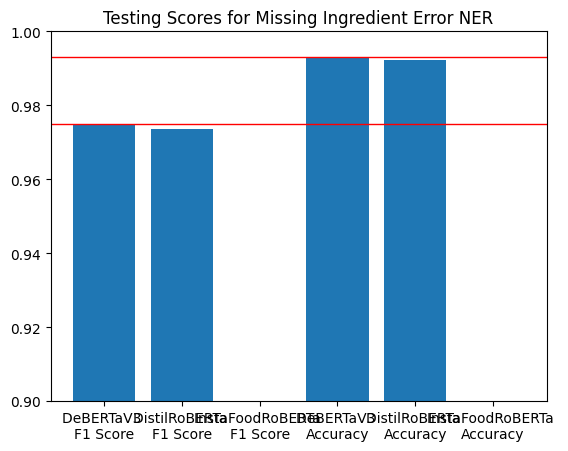

In [32]:
import matplotlib.pyplot as plt

x = np.array(["DeBERTaV3 \nF1 Score", "DistilRoBERTa \nF1 Score","InstaFoodRoBERTa \nF1 Score", "DeBERTaV3 \nAccuracy", "DistilRoBERTa \nAccuracy","InstaFoodRoBERTa \nAccuracy"])
y = np.array([f1_score(debground, debpred, average='macro'), f1_score(drobground, drobpred, average='macro'), 0.49, accuracy_score(debground, debpred), accuracy_score(drobground, drobpred), 0.9])

plt.bar(x,y)
plt.title('Testing Scores for Missing Ingredient Error NER')
plt.ylim(0.9,1)
plt.axhline(y=max([f1_score(debground, debpred, average='macro'), f1_score(drobground, drobpred, average='macro')]),linewidth=1, color='red')
plt.axhline(y=max([accuracy_score(debground, debpred), accuracy_score(drobground, drobpred)]),linewidth=1, color='red')
plt.show()